In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.io.parsers.read_csv("insurance.csv")

In [3]:
df=pd.get_dummies(dataset, dtype=int)

In [4]:
#df=df.sample(frac=1)

In [5]:
stop=round(len(df.index)*.80)
Xtrain=df.iloc[:stop]
Xtest=df.iloc[stop+1:]
Ytrain=Xtrain["charges"]
Ytest=Xtest["charges"]
Xtrain=Xtrain.drop("charges", axis=1)
Xtest=Xtest.drop("charges", axis=1)

In [6]:
x=Xtrain.to_numpy()
y=Ytrain.to_numpy().reshape(-1,1)
xtest=Xtest.to_numpy()
ytest=Ytest.to_numpy().reshape(-1,1)

In [7]:
prior_var = 1e2 # variance of parameter prior 
noise_var = 1e1 # noise variance 
N,D=x.shape
prior_mean = np.zeros(D).reshape(-1,1)

In [8]:
def post(X, y):
    SN=np.linalg.inv(prior_var**(-1)*np.identity(D)+noise_var**(-1)*X.T@X)
    mN=SN@(prior_var**(-1)*np.identity(D)@prior_mean+noise_var**(-1)*X.T@y)
    return SN, mN

In [9]:
SN,mN=post(x,y)

In [10]:
S=1000
weights=np.random.normal(mN, np.sqrt(np.diag(SN)).reshape(-1,1), size=(D,S))

In [11]:
pred=xtest@weights

In [12]:
pred_mean=pred.mean(axis=1).reshape(-1,1)

In [13]:
def RMSE(y,pred):
    N=y.shape[0]
    s=sum(np.power(y-pred,2))
    return np.sqrt(s/N)

In [14]:
RMSE(ytest,pred_mean)

array([5866.46842951])

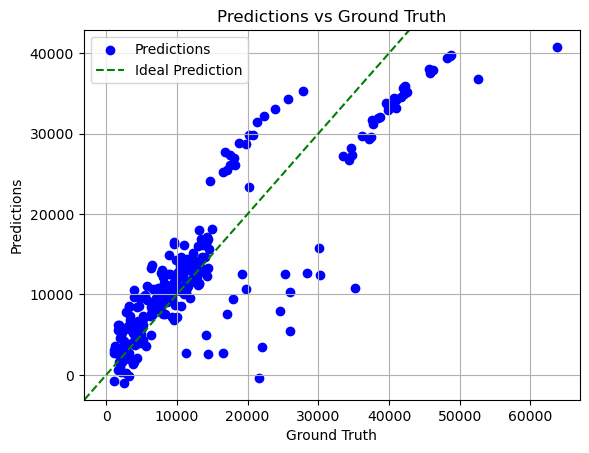

In [15]:
plt.figure()
plt.scatter(ytest, pred_mean, color="blue", label="Predictions")
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.axline((0, 0), slope=1, color='green', linestyle='--', label='Ideal Prediction')  
plt.legend()
plt.grid()
plt.show()